
# Overview of Unsupervised Learning

**Unsupervised learning** is a type of machine learning where the model learns patterns from unlabeled data. Unlike supervised learning, where the model is trained on labeled examples, unsupervised learning algorithms try to infer the underlying structure of the data without any explicit labels. This makes it particularly useful for exploratory data analysis, clustering, and dimensionality reduction.

## Types of Unsupervised Learning

Unsupervised learning can be broadly categorized into two main types:

-   **Dimensionality Reduction**: Reducing the number of features while preserving the essential structure of the data.
-   **Clustering**: Grouping similar data points together based on their features.

## Dimensionality Reduction

**Dimensionality reduction** techniques aim to reduce the number of features in a dataset while retaining its essential characteristics. This is particularly useful for visualizing high-dimensional data or improving the performance of machine learning models by reducing noise and computational complexity. Common dimensionality reduction techniques include:

-   **Principal Component Analysis (PCA)**: Projects the data onto a lower-dimensional space by maximizing the variance along the new axes (principal components).
-   **t-Distributed Stochastic Neighbor Embedding (t-SNE)**: A non-linear technique that visualizes high-dimensional data by minimizing the divergence between probability distributions of pairwise similarities in high and low dimensions.
-   **Autoencoders**: Neural networks that learn to encode the input data into a lower-dimensional representation and then decode it back to the original space. They are particularly useful for learning complex, non-linear mappings.

## Clustering

**Clustering** is often used to discover inherent groupings in data, such as customer segmentation in marketing or grouping similar documents in text analysis. Common clustering algorithms include:

-   **K-Means**: Partitions data into K clusters by minimizing the variance within each cluster.
-   **Hierarchical Clustering**: Builds a tree of clusters by either merging or splitting clusters based on distance metrics.
-   **DBSCAN**: Groups together points that are closely packed together while marking points that lie alone in low-density regions as outliers.
-   **Gaussian Mixture Models (GMM)**: Assumes that the data is generated from a mixture of several Gaussian distributions and uses the Expectation-Maximization algorithm to estimate the parameters of these distributions.

### Advantages and Disadvantages

-   **Advantages**:
    -   Can discover hidden patterns and structures in data.
    -   Useful for exploratory data analysis and feature engineering.
    -   Can handle large datasets without the need for labeled data.
-   **Disadvantages**:
    -   Results can be difficult to interpret, especially in hierarchical clustering.
    -   No guarantee of finding meaningful patterns; results can be sensitive to the choice of algorithm and parameters.
    -   Evaluation of clustering results can be challenging without ground truth labels.

## Example: PCA and K-Means

To illustrate the concepts of unsupervised learning, we will use the Iris dataset and apply PCA for dimensionality reduction and K-Means for clustering.

-   Load the iris dataset

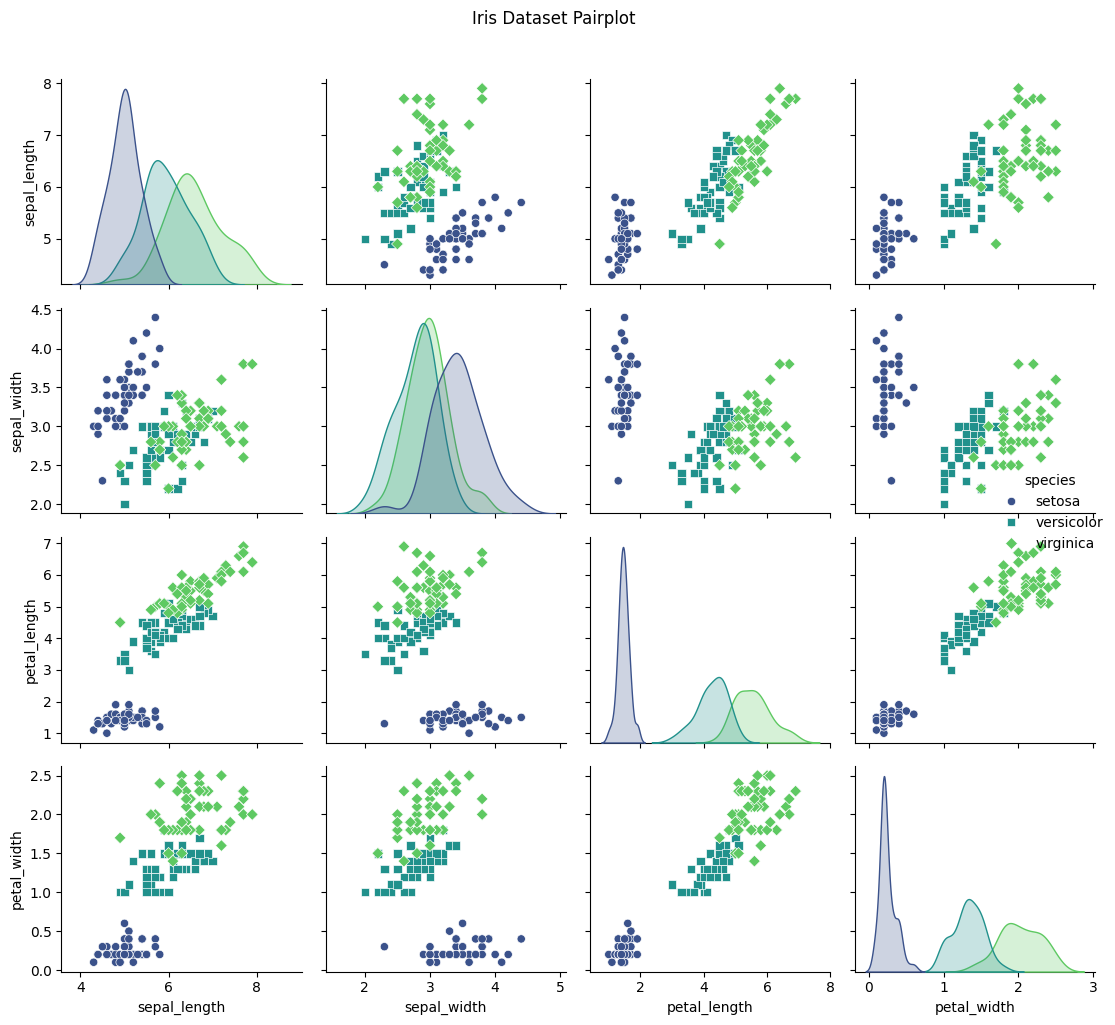

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the Iris dataset
df = sns.load_dataset('iris')
X = df.drop(columns=['species'])
y = df['species'].astype('category').cat.codes

sns.pairplot(df, hue='species', palette='viridis', markers=["o", "s", "D"])
plt.suptitle('Iris Dataset Pairplot', y=1.02)
plt.xlabel('Features')
plt.ylabel('Features')
# plt.legend(title='Species', loc='upper right')
plt.tight_layout()
plt.show()

-   Preprocess the data

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

# Standardize the data
scaler = Normalizer()
X = scaler.fit_transform(X)

-   Apply PCA for dimensionality reduction to 2 dimensions and visualize the results

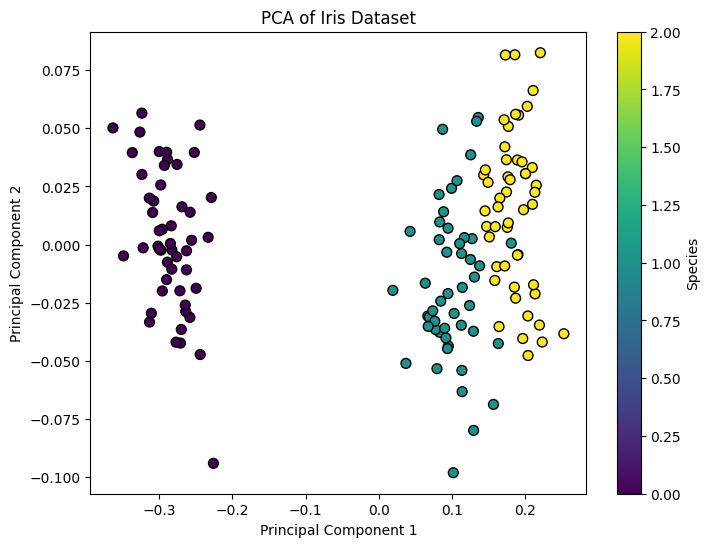

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2, n_oversamples=100, random_state=42)
X_pca = pca.fit_transform(X)

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Species')
plt.show()

-   Apply K-Means clustering on the PCA-reduced data and visualize the clusters

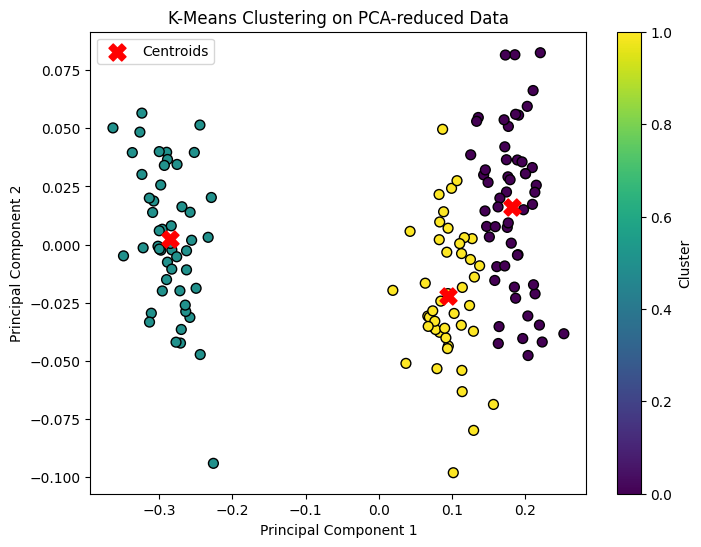

In [4]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, max_iter=10, random_state=42)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

# Plot the K-Means clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=150, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering on PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()

-   Evaluate the clustering results using the Adjusted Rand Index, and the silhouette score

In [5]:
import numpy as np
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Calculate Adjusted Rand Index
ari = adjusted_rand_score(y, y_kmeans)
print(f'Adjusted Rand Index: {ari:.2f}')

# Calculate silhouette score
silhouette_avg = silhouette_score(X_pca, y_kmeans)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Adjusted Rand Index: 0.90
Silhouette Score: 0.61


-   Visualize the decision boundary of K-Means clustering

Text(0.5, 1.0, 'Decision Boundary of K-Means Clustering')

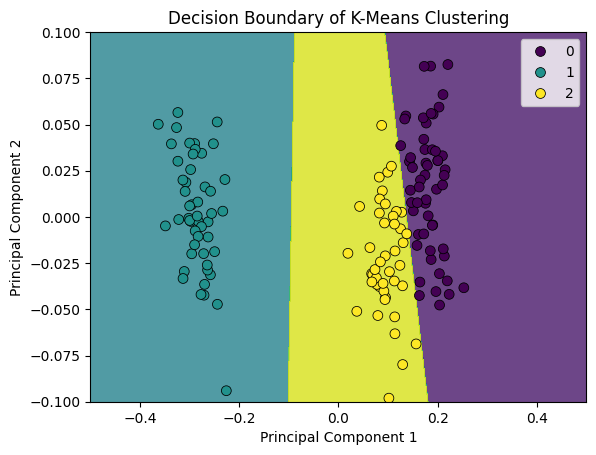

In [6]:
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np
import matplotlib.pyplot as plt
DecisionBoundaryDisplay.from_estimator(
    kmeans, X_pca, response_method="predict", cmap='viridis', alpha=0.8,
    grid_resolution=5000, xlabel='Principal Component 1', ylabel='Principal Component 2'
)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_kmeans, palette='viridis', edgecolor='k', s=50)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.1, 0.1)
plt.title('Decision Boundary of K-Means Clustering')

## Hands-on Exercises

Apply PCA and K-Means clustering on a different dataset, such as the Wine dataset or the Breast Cancer dataset from scikit-learn. Visualize the results and interpret the clusters formed.

-   Load the dataset

In [7]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)

-   Explore the dataset

In [8]:
print(cancer_df.head())
print(cancer_df.describe())
print(cancer_df.info())
print(cancer_df.isnull().sum())
print(cancer_df.shape)
print(cancer_df.columns)
print(cancer_df.dtypes)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

-   Visualize the dataset

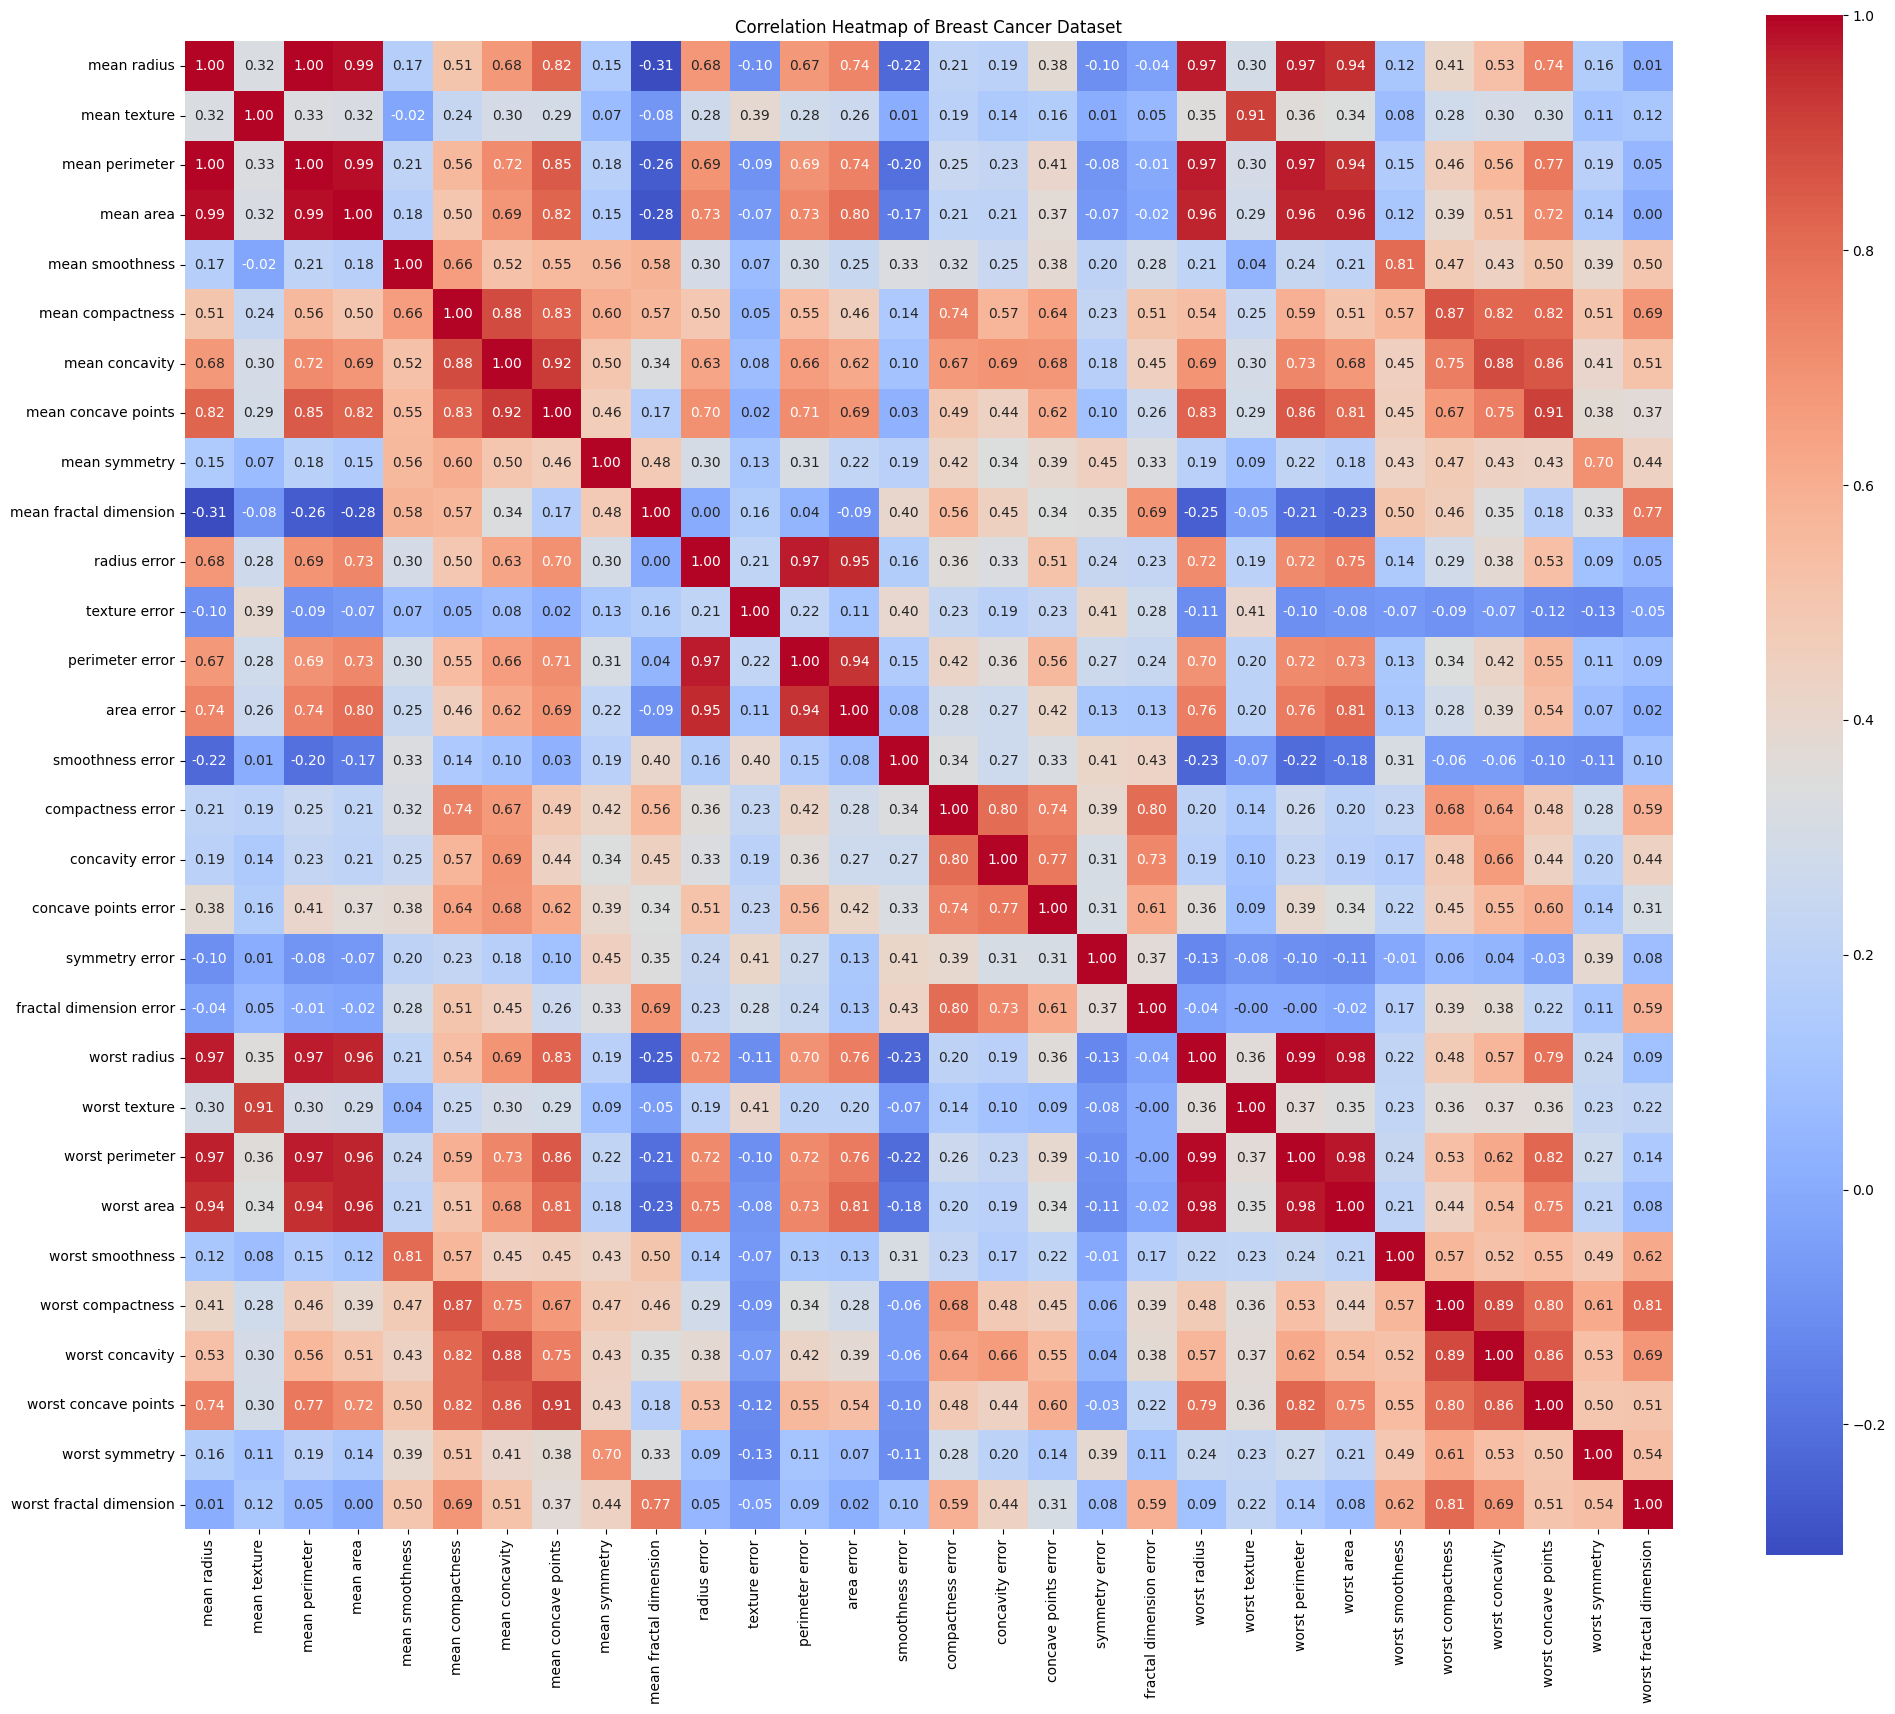

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(24, 20))
sns.heatmap(cancer_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Breast Cancer Dataset')
plt.show()

-   Preprocess the data

In [10]:
scaler = StandardScaler()
X_cancer = scaler.fit_transform(cancer_df)

-   Apply PCA to reduce to 2 dimensions

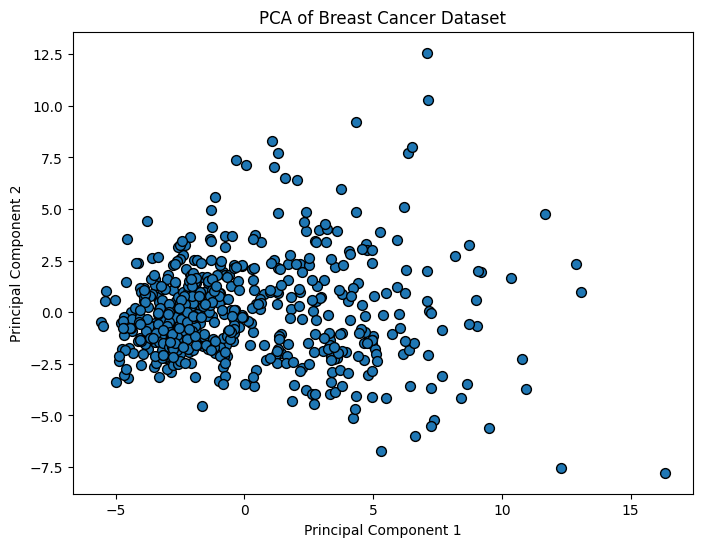

In [11]:
pca_cancer = PCA(n_components=2, random_state=42)
X_cancer_pca = pca_cancer.fit_transform(X_cancer)

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_cancer_pca[:, 0], X_cancer_pca[:, 1], edgecolor='k', s=50)
plt.title('PCA of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

-   Apply K-Means clustering and plot the results

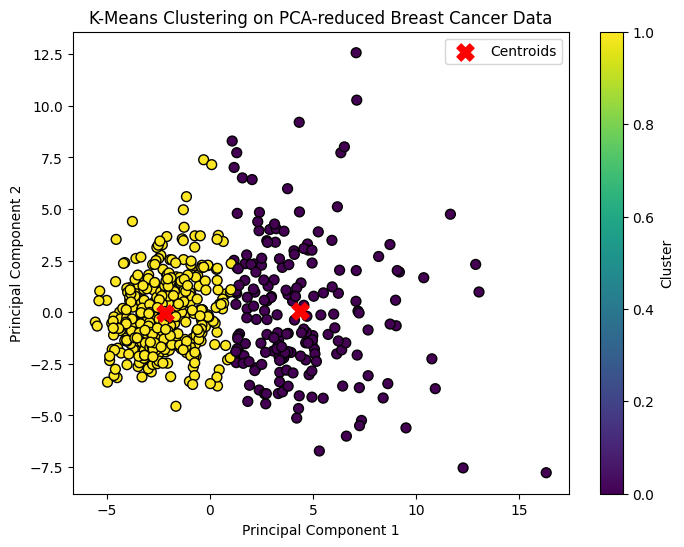

In [12]:
kmeans_cancer = KMeans(n_clusters=2, random_state=42)
kmeans_cancer.fit(X_cancer_pca)
y_cancer_kmeans = kmeans_cancer.predict(X_cancer_pca)

# Plot the PCA results with K-Means clustering
plt.figure(figsize=(8, 6))
plt.scatter(X_cancer_pca[:, 0], X_cancer_pca[:, 1], c=y_cancer_kmeans,
            cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans_cancer.cluster_centers_[:, 0], kmeans_cancer.cluster_centers_[:, 1],
            s=150, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering on PCA-reduced Breast Cancer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()